# The Sparks Foundation: GRIP July 2021

## Task : Color Identification in Images

### By : Siddhesh Bangar

Importing all the required Libraries for the project.

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

To read any image, we use the method cv2.imread() 
We can then plot it using the pyplot’s method imshow().

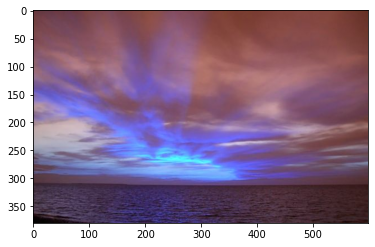

In [13]:
image = cv2.imread('sample_image.jpg')
plt.imshow(image)

The color of the image looks a bit off. This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).

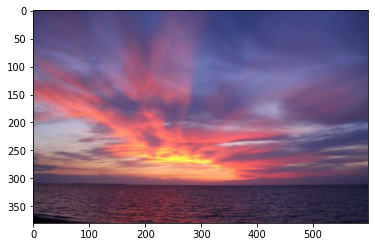

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [15]:
type(image)

numpy.ndarray

In [16]:
image.shape

(380, 599, 3)

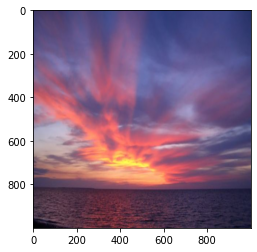

In [18]:
reimage = cv2.resize(image,(1000,1000))
plt.imshow(reimage)

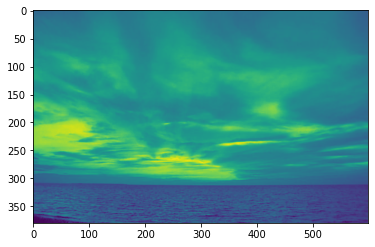

In [19]:
grimage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(grimage)

### Color Identification

#### RGB to HEX Conversion

In [20]:
def rgb2hex(color):
     return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#### Read image in RGB color space

In [22]:
def getimage(imagepath):
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

#### Get colors from an image

In [33]:
def getcolors(image, noofcolors, showchart):
    modifiedimage = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modifiedimage = modifiedimage.reshape(modifiedimage.shape[0]*modifiedimage.shape[1], 3)
    
    clf = KMeans(n_clusters = noofcolors)
    labels = clf.fit_predict(modifiedimage)
    
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb2hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (showchart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([241.78799922, 138.93489353, 112.57226965]),
 array([124.56702706, 107.27708245, 156.98154559]),
 array([86.52390119, 52.59843867, 73.34755641]),
 array([48.51886523, 36.4321897 , 61.06695495]),
 array([112.57078519,  83.72721056, 124.45460976]),
 array([184.75055816, 156.55038879, 173.06520902]),
 array([176.23272751,  98.29755828, 119.74292031]),
 array([ 73.1587166 ,  72.23220046, 127.65131481])]

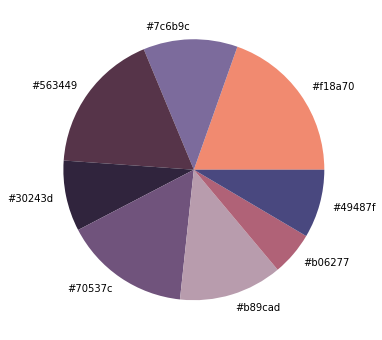

In [34]:
getcolors(getimage('sample_image.jpg'), 8, True)

### Trying out this function with another image

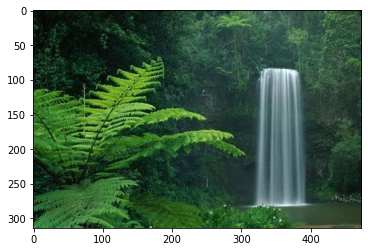

In [39]:
image2 = getimage('sample.jpg')
plt.imshow(image2)

[array([ 50.86324458, 106.79600098,  38.28956276]),
 array([28.53038367, 57.65583684, 39.96154024]),
 array([103.08904165, 131.206389  , 133.38398706]),
 array([ 69.30448786, 108.26467049,  81.5834926 ]),
 array([107.35643903, 162.51040099,  67.39667442]),
 array([46.6963543 , 76.78074866, 61.8251634 ]),
 array([10.13565058, 30.5951234 , 16.40556832]),
 array([161.75474769, 186.27048291, 187.77699403])]

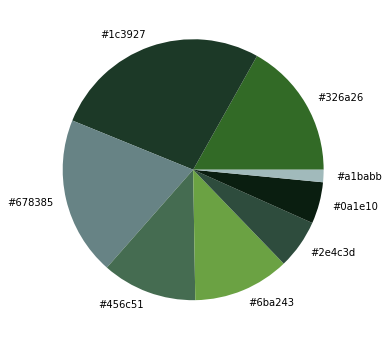

In [41]:
getcolors(image2, 8, True)

### We Used KMeans Clustering algorithm to extract colors from the images andn displayed the identified colors in form of pie chart.